# COGS 108 - Final Project 

# Overview

Critics and audiences often disagree on how they evaluate films. This can be seen when the same movie receives different ratings across different online movie-review platforms: the critics' score in Rotton Tomatoes and the audiences' rating in IMDB Rating. We are interested in explaining whether differences in ratings are exaggerated or minimized based on movie factors such as genre, revenue, and release year. 


# Names and PIDs

- Danh Ho, A15729081
- Jinrong Gong, A13926493
- Matthew Beason, A14721052
- Vincent Gao, A14148226

# Research Question

Are there systematic differences between Rotten Tomatoes score and IMDB ratings based on the parameters of the films such as genre, movie rating, gross revenue, and release year?

## Background and Prior Work

Film critics as a demographic have noticeable biases that may or may not be reflected in the data. For example, they have left-leaning political views, which can significantly affect certain films but does not necessarily correlate with broad categories like genre. Also in consideration are the aggregate sites themselves, which compare critic reviews to one another and could pressure dissenting critics to conform to the majority. 

Differences across time are especially interesting to see if the emergence of aggregate sites themselves could reflect a difference in the way opinions are shaped. For example, final project 88 worked on Oscar award-winning and nominated films also used an IMDB dataset. They found a fairly high correlation between critic and audience opinion. However, this is likely to be the case as film quality is generally agreed upon. On the other hand, our study focuses on analyzing the differences that do exist.


References (include links):
- https://pagetwo.completecolorado.com/2018/12/14/film-critics-increasingly-bias-their-work-through-a-political-left-lens/ 
- (Explains how political views shape film critics' movie rating)
- https://variety.com/2017/film/columns/rottentomatoes-the-danger-of-film-critics-speaking-as-one-1202533533/ 
- (Explains how film critics' rating may not represent how the movie actually is)
- https://github.com/COGS108/FinalProjects-Wi18/blob/master/088-FinalProject.ipynb 
- (Explains the correlation of public rating, critic rating and the Oscar awards)
- https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic 
- (Compare and contrast Rotton Tomatoes and IMDB ratings)

# Hypothesis


We do believe that we will find systematic differences between user reviews and critics ratings, especially in action-oriented films with high budgets and were published in recent years. We make this prediction based on our observation within our friend groups and on social media. Among all the movies, action films such as the Marvel movies are highly rated among the average movie-goers, but professional movie reviewers are quite critical of them.

# Dataset(s)

- Dataset Name: Rated Films
- Link to the dataset: https://courses.cs.washington.edu/courses/cse442/17sp/a2-example/
- Number of observations: 3201 observations
- Our dataset uses observations of films on Rotten Tomatoes and IMDB collected in 2010. It contains each film's genre, US and Worldwide gross, budget, release date, MPAA rating, genre, Rotten Tomatoes rating, and IMDB rating. We strive to compare the Rotten Tomatoes rating (critics' rating) and IMDB rating (movie-goers' rating) across different categories listed above.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import io
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

Below are the code and explainations for each step of our data cleaning process.

In [2]:
# load dataset from the website
data_url="https://courses.cs.washington.edu/courses/cse512/data/a2/movies.csv"
s=requests.get(data_url).content

# read the dataset as a data frame
df=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [3]:
# drop NaN in column 'Rotten Tomatoes Rating' and 'IMDB Rating' so we can compare the ratings
df = df.dropna(subset=['Rotten Tomatoes Rating', 'IMDB Rating'])

# since the IMDB rating is out of 10, and Rotten Tomatoes is out of 100,
# we times IMDB Rating by 10
df['IMDB Rating'] = df['IMDB Rating'].apply(lambda x: x*10)

# Since the data has words as the release month, we replace the words by month numbers
def date_filter(d):
    d = d.replace("Jan","1").replace("Feb","2").replace("Mar","3").replace("Apr","4").replace("May","5").replace("Jun","6")
    d = d.replace("Jul","7").replace("Aug","8").replace("Sep","9").replace("Oct","10").replace("Nov","11").replace("Dec","12")
    return d

# filter Release Date into this format: "DD-MM-YY"
df['Release Date'] = df['Release Date'].apply(date_filter)
df = df.dropna(subset=["Release Date"])

# calculate the rating difference
def calculate_diff(row):
    return int(row['Rotten Tomatoes Rating']) - int(row['IMDB Rating'])

# new column recording the difference between Rotten Tomatoes Rating and IMDB Rating
df["RT-IMDB"] = df.apply(calculate_diff, axis=1)

In [4]:
# the ratings contain {'G', 'NC-17', 'Not Rated', 'Open', 'PG', 'PG-13', 'R'}
# filter out 'Not Rated', 'Open' and 'NC-17' (only has 1 datapoint) to drop them
def rating_filter(d):
    if d == "Not Rated" or d == "Open" or d == "NC-17":
        return None
    return d

# filter MPAA Rating
df["MPAA Rating"] = df["MPAA Rating"].apply(rating_filter)

# drop NaN for the MPAA Rating and store it in df_MPAA
# we have 1849 rows to work with in df_MPAA
df_MPAA = df.dropna(subset=["MPAA Rating"])

# Data Analysis & Results

Below are our visualizaion, analysis and results.

In [5]:
print("Average IMDB Rating is", sum(list(df['IMDB Rating']))/len(df))
print("Average Rotten Tomatoes Rating is",sum(list(df['Rotten Tomatoes Rating']))/len(df))

Average IMDB Rating is 63.08097345132743
Average Rotten Tomatoes Rating is 54.279646017699115


Text(0.5, 1.0, 'Rating Distribution of IMBD and Rotten Tomatoes')

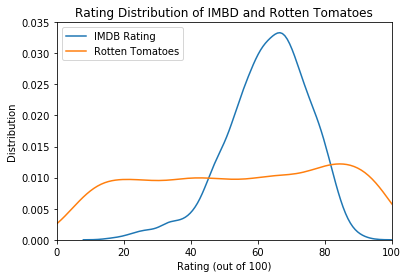

In [6]:
plt.xlim(0, 100)
sns.distplot(df['IMDB Rating'], label="IMDB Rating", hist=False) 
sns.distplot(df['Rotten Tomatoes Rating'], label="Rotten Tomatoes", hist=False)
plt.xlabel('Rating (out of 100)')
plt.ylabel('Distribution')
plt.title("Rating Distribution of IMBD and Rotten Tomatoes")

The rating difference in all movies shows that IMDB ratings are generally higher than the Rotten Tomatoes rating, with an average of 63.08 and 54.28 respectively.

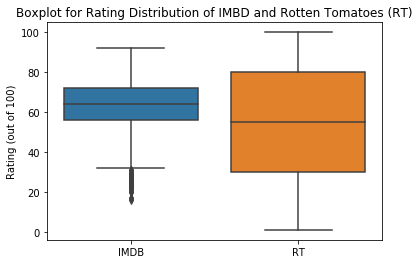

In [7]:
df_ratings = pd.DataFrame()
df_ratings["IMDB"] = df['IMDB Rating']
df_ratings["RT"] = df['Rotten Tomatoes Rating']
plt.ylabel('Rating (out of 100)')
plt.title("Boxplot for Rating Distribution of IMBD and Rotten Tomatoes (RT)")
sns.boxplot(data=df_ratings)

This shows that scale of range between critics and users when ratings movies. The average user scores is more centralized while critics have a more diverse magnitude of ratings. 

In [8]:
median = np.median(df_ratings['IMDB'])
upper_quartile = np.percentile(df_ratings['IMDB'], 75)
lower_quartile = np.percentile(df_ratings['IMDB'], 25)
iqr = upper_quartile - lower_quartile

print("For IMDB Ratings:")
print("The lower quartile, median, upper quartile are", lower_quartile, median, upper_quartile)
print("The IQR is", iqr)
print()

median = np.median(df_ratings['RT'])
upper_quartile = np.percentile(df_ratings['RT'], 75)
lower_quartile = np.percentile(df_ratings['RT'], 25)
iqr = upper_quartile - lower_quartile

print("For Rotten Tomatoes Ratings:")
print("The lower quartile, median, upper quartile are", lower_quartile, median, upper_quartile)
print("The IQR is", iqr)

For IMDB Ratings:
The lower quartile, median, upper quartile are 56.0 64.0 72.0
The IQR is 16.0

For Rotten Tomatoes Ratings:
The lower quartile, median, upper quartile are 30.0 55.0 80.0
The IQR is 50.0


IMDB users tend to give more conservative ratings than the Rotten Tomatoes rating. The majority of their rating lies within 5.6 and 7.2 (out of 10), whereas the majority of Rotten Tomatoes rating lies within 30% and 80%

Text(0.5, 1.0, 'Difference between RT and IMDB Rating by MPAA Rating')

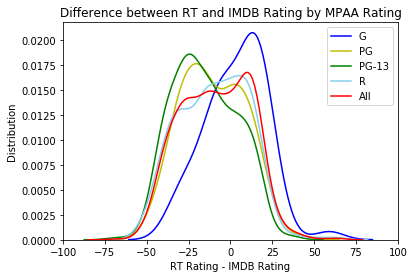

In [9]:
plt.xlim(-100, 100)
sns.distplot(df_MPAA.loc[df_MPAA['MPAA Rating'] == 'G']['RT-IMDB'], color="b", hist=False, label="G")
sns.distplot(df_MPAA.loc[df_MPAA['MPAA Rating'] == 'PG']['RT-IMDB'], color="y", hist=False, label="PG")
sns.distplot(df_MPAA.loc[df_MPAA['MPAA Rating'] == 'PG-13']['RT-IMDB'], color="g", hist=False, label="PG-13")
sns.distplot(df_MPAA.loc[df_MPAA['MPAA Rating'] == 'R']['RT-IMDB'], color="skyblue", hist=False, label="R")
sns.distplot(df['RT-IMDB'], color="r", hist=False, label="All")
plt.xlabel('RT Rating - IMDB Rating')
plt.ylabel('Distribution')
plt.title("Difference between RT and IMDB Rating by MPAA Rating")

As we can see, the rating difference in PG and R closely matches with the rating difference in all movies.

- For movies with rating G, Rotten Tomatoes users gives higher score on average.
- For movies with rating PG-13, Rotten Tomatoes users gives lower score on average.
- For movies with rating PG and R, Rotten Tomatoes and IMDB users give their typical scores that closely matches with the average scores they give to all moview.

In [10]:
# the US Gross and Worldwide Gross contain 0 as NaN, so we drop the 0s
# 5 movies have less than 10k Worldwide, so we filter them out as outliers
# then, we divide the number by 1,000,000 to make the numbers smaller
def gross_filter(d):
    if not d or not d.isdigit():
        return None
    if int(d) == 0 or int(d) < 10000:
        return None
    return int(d)/1000000

# filter Gross
df["US Gross"] = df["US Gross"].apply(gross_filter)
df["Worldwide Gross"] = df["Worldwide Gross"].apply(gross_filter)

# drop NaN for the Gross and store it in df_Gross
# we have 2237 rows to work with in df_Gross
df_Gross = df.dropna(subset=["US Gross", "Worldwide Gross"])

# What Other Parameters Stand Out?

Text(0.5, 1.0, 'Average RT and IMDB Rating vs Worldwide Gross')

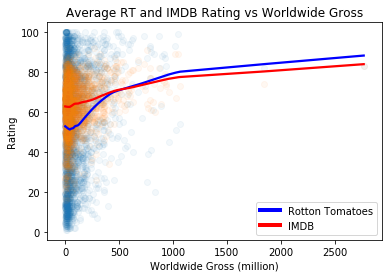

In [11]:
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Rotton Tomatoes'),
                   Line2D([0], [0], color='red', lw=4, label='IMDB')]
fig , ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower_quartile')

sns.regplot(x='Worldwide Gross', y='Rotten Tomatoes Rating', data=df_Gross, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'blue'})
sns.regplot(x='Worldwide Gross', y='IMDB Rating', data=df_Gross, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.xlabel('Worldwide Gross (million)')
plt.ylabel('Rating')
plt.title("Average RT and IMDB Rating vs Worldwide Gross")

Please find the explaination for this graph below.

Text(0.5, 1.0, 'Average RT and IMDB Rating vs US Gross')

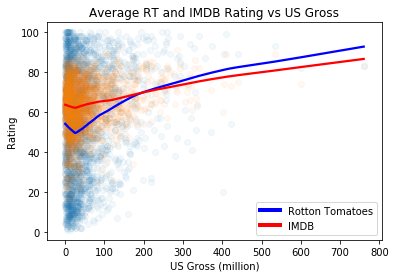

In [12]:
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Rotton Tomatoes'),
                   Line2D([0], [0], color='red', lw=4, label='IMDB')]
fig , ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower_quartile')

sns.regplot(x='US Gross', y='Rotten Tomatoes Rating', data=df_Gross, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'blue'})
sns.regplot(x='US Gross', y='IMDB Rating', data=df_Gross, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.xlabel('US Gross (million)')
plt.ylabel('Rating')
plt.title("Average RT and IMDB Rating vs US Gross")


We added the parameters of US and worldwide gross to see if there was a difference in how popular a movie would be locally compared to how the world would view a movie. There seems to be no difference in the two with these two graphs. But what these graphs both showed was that professional critics rated movies with a lower gross in the US and Internationally lower than those scored by users of IMDB. 

Text(0.5, 1.0, 'Average RT and IMDB Rating vs Production Budget')

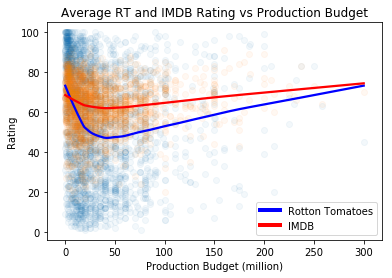

In [13]:
df["Production Budget"] = df["Production Budget"].apply(lambda x:x/1000000)

legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Rotton Tomatoes'),
                   Line2D([0], [0], color='red', lw=4, label='IMDB')]
fig , ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower_quartile')

sns.regplot(x='Production Budget', y='Rotten Tomatoes Rating', data=df, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'blue'})
sns.regplot(x='Production Budget', y='IMDB Rating', data=df, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.xlabel('Production Budget (million)')
plt.ylabel('Rating')
plt.title("Average RT and IMDB Rating vs Production Budget")


This graph shows how movie ratings change base on the movie' production budget. It appears that small-budgeted indie films have surprisingly high ratings from both the audiences and the critics. On average, professional critics is more critical than the movie-goers, but they both prefers indie films and high budgeted ones.

In [14]:
# filter out the date in the release year
for i, r in df.iterrows():
    date = r['Release Date']
    if not date: continue
    # account for data with only release years
    if date.find("-") == -1: 
        # filter out junk data
        if date.find("il") == 1: continue
        else: df.loc[i, 'Release_year'] = int(date)
        continue
    d,m,y = date.split("-")
    
    # make year into YYYY format instead of YY format for better comparison
    if int(y) > 10: y = int("19"+y)
    else: y = int("20"+y)
        
    df.loc[i, 'Release_year'] = y

# the range of the movies are from 1915 to 2010

Text(0.5, 1.0, 'Average RT and IMDB Rating vs Release year')

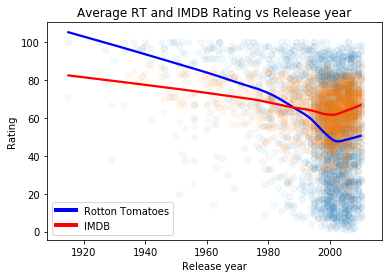

In [15]:
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Rotton Tomatoes'),
                   Line2D([0], [0], color='red', lw=4, label='IMDB')]
fig , ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower_quartile')

sns.regplot(x='Release_year', y='Rotten Tomatoes Rating', data=df, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'blue'})
sns.regplot(x='Release_year', y='IMDB Rating', data=df, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.xlabel('Release year')
plt.ylabel('Rating')
plt.title("Average RT and IMDB Rating vs Release year")

Even though there is a huge difference in sample size of the release of a movie, this graph shows that movie critics prefer the older and more classic moview over the newer releases, but they are warming up toward films after 2000. Maybe it is because the special effects are getting better. The same could be said for users of IMDB, but the difference is not as glaring.

Text(0.5, 1.0, 'Average RT and IMDB Rating vs Run Time')

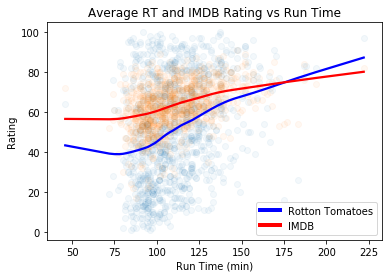

In [16]:
# analyze the movie runtime, have 983 data points
df_runtime = df.dropna(subset=["Running Time (min)"])

legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Rotton Tomatoes'),
                   Line2D([0], [0], color='red', lw=4, label='IMDB')]
fig , ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower_quartile')

sns.regplot(x='Running Time (min)', y='Rotten Tomatoes Rating', data=df_runtime, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'blue'})
sns.regplot(x='Running Time (min)', y='IMDB Rating', data=df_runtime, lowess=True, scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.xlabel('Run Time (min)')
plt.ylabel('Rating')
plt.title("Average RT and IMDB Rating vs Run Time")


Lastly, this graph shows the run time of movies vs their ratings. This shows that movies with longer run times are rated higher by both users and critics.

# Relationship between movie genres and ratings

In [17]:
genres = df.dropna(subset=['Major Genre','Rotten Tomatoes Rating','IMDB Rating'])

In [18]:
#Name of all genres
names = genres['Major Genre'].unique()

In [19]:
#density plot of all genres based on the rating system given
def density_rating (rating):
    # Iterate through the genres
    for name in names:
        # Subset to the genres
        subset = genres[genres['Major Genre'] == name]
    
        # Draw the density plot
        sns.distplot(subset[rating], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)
        # Plot formatting
        plt.legend(prop={'size': 6}, title = 'Genres')
        plt.title('Density Plot with Multiple Genres')
        plt.xlabel(rating)
        plt.ylabel('Density')

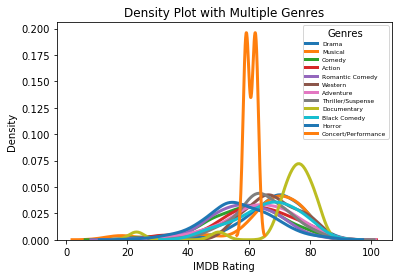

In [20]:
#the plot based on IMDB Rating of all genres
density_rating('IMDB Rating')
#Most IMDB raters agree that Concert/Performance is around the score of 6

This is a quick graph showing the the IMDB rating for each genre of movie. Musical films are getting a surprisingly homogeneous rating of 6/10.

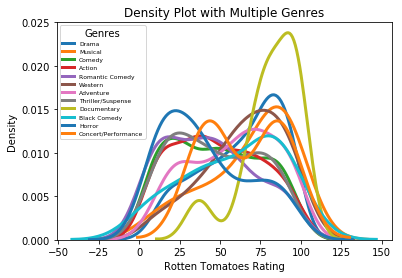

In [21]:
#the plot based on Rotten Tomatoes Rating of all genres
density_rating('Rotten Tomatoes Rating')
#Most RT raters think that Documentary has a score of around 90-95

This graph shows the same thing with Rotton Tomatoes Ratings. It seems that the Documentary is rated the most favorably by the critics. 

In [22]:
rating_system = ['IMDB Rating', 'Rotten Tomatoes Rating']

In [23]:
#desity plot of two rating system based on the given genre
def density_genre (genre):
    # Iterate through the rating system
    for name in rating_system:
        # Subset to the genres
        subset = genres[genres['Major Genre'] == genre]
    
        # Draw the density plot
        sns.distplot(subset[name], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)
    
    sns.distplot(genres['IMDB Rating'], hist = False, kde = True, kde_kws = {'linewidth': 3},
                label = 'Rough IMDB Rating all Genres')
    sns.distplot(genres['Rotten Tomatoes Rating'], hist = False, kde = True, kde_kws = {'linewidth': 3},
                label = 'Rough Rotten Tomatoes Rating all Genres')
    # Plot formatting
    plt.legend(prop={'size': 6}, title = 'Rating System')
    plt.title(genre + ' Genre Density Plot') 
    plt.xlabel(genre)
    plt.ylabel('Density')

# A focus on Action Genre

Text(0.5, 1.0, 'Rotten Tomatoes Rating Distribution')

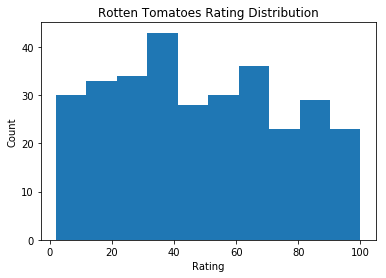

In [24]:
genres[genres['Major Genre'] == 'Action']['Rotten Tomatoes Rating'].plot('hist')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Rotten Tomatoes Rating Distribution")


For Rotten Tomatoes the distribution is not normal with no prominent clusters

Text(0.5, 1.0, 'IMDB Rating Distribution')

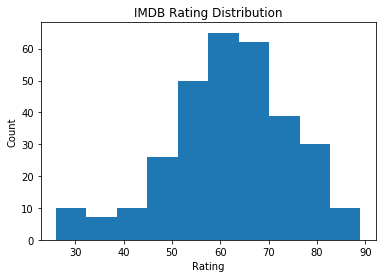

In [25]:
genres[genres['Major Genre'] == 'Action']['IMDB Rating'].plot('hist')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("IMDB Rating Distribution")

For IMDB the distribution probably cluster around 60 and looks pretty normal

In [26]:
#normalize the rating of imb and rotten tomatoes to have consistent output

#Method to normalize based on given rating system /
def normalize(df, feature_name):
    result = df.copy()
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    #could delete the '*100' at the end of this line to make data range from 0 - 1
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value) * 100
    return result

genres = normalize(genres, 'IMDB Rating')
genres = normalize(genres, 'Rotten Tomatoes Rating')

Below are the rating density plot for different movie genres. 
- the blue line represents the average IMDB rating for this particular genre
- the orange line represents the average RT rating for this particular genre
- the green line represents the average IMDB rating across all movies
- the red line represents the average RT rating across all movies

The green line and the red line serve as baselines to compare the average ratings for this particular genre

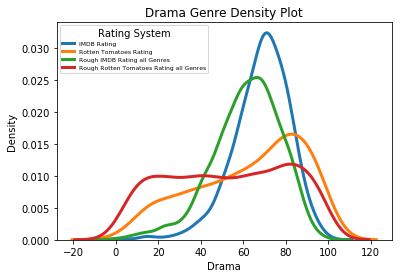

In [27]:
#after normalization
density_genre('Drama')

Both the movie-goers and the critics rate Drama genre more favorably.

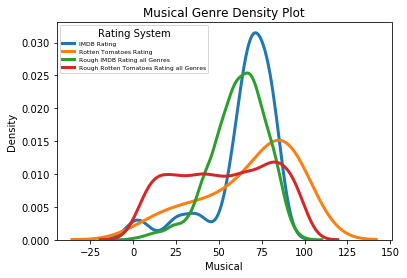

In [28]:
density_genre('Musical')

Similar to drama genre, both the movie-goers and the critics rate Musical genre more favorably.

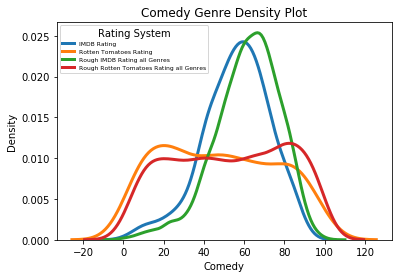

In [29]:
density_genre('Comedy')

Both the movie-goers and the critics rate Comedy genre less favorably, but not by much.

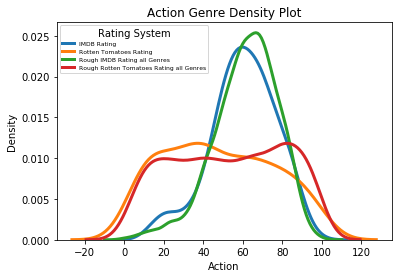

In [30]:
density_genre('Action')

Both the movie-goers and the critics rate Action genre less favorably, but not by much.

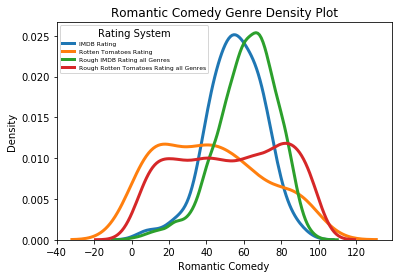

In [31]:
density_genre('Romantic Comedy')

Both the movie-goers and the critics rate Romatic genre less favorably with visible difference.

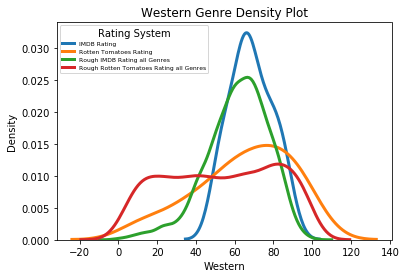

In [32]:
density_genre('Western')

Both the movie-goers and the critics rate Western genre more favorably, and the rating is more homogeneous.

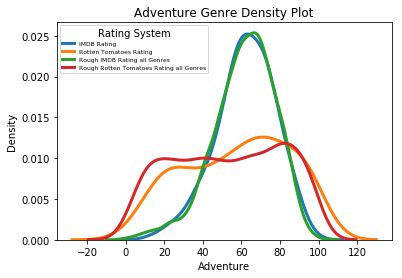

In [33]:
density_genre('Adventure')

Both the movie-goers and the critics rate Action genre less favorably, but not by much. Very similar to Action genre.

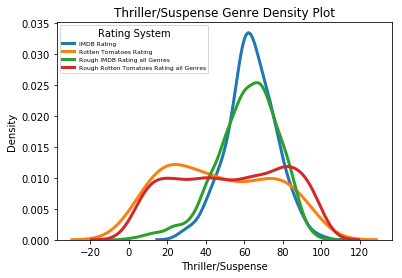

In [34]:
density_genre('Thriller/Suspense')

Both the movie-goers and the critics rate Thriller genre more homogeneously.

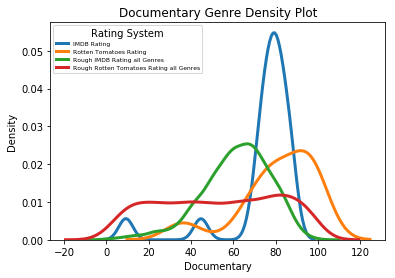

In [35]:
density_genre('Documentary')

Both the movie-goers and the critics love Documentary, and the score is more homogeneous as well.

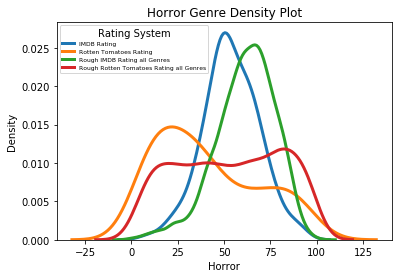

In [37]:
density_genre('Horror')

Both the movie-goers and the critics rate Horror genre less favorably with visible difference. Critics are a lot more critical than usual.

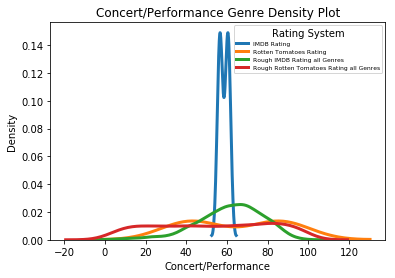

In [38]:
density_genre('Concert/Performance')

This graph seems to be less representative because of the small sample size. We include this to show an outlier in the genres.

Both IMDB and Rotten Tomatoes Rating favors Drama, Musical and especially Documentary. Their least fa

# Ethics & Privacy

   There is a high risk that the datasets are not representative of the entire population. IMDB’s rating demographics can be viewed publicly and reveal a large male majority for most films. Other factors may not be as explicit, but it is likely that the barrier to entry of being able and willing to maintain a user rating profile in that particular community results in systemic differences. Furthermore, Rotten Tomatoes only collects ratings from critics from large publications and outlets. This has resulted in an overwhelming male majority that could be explained by the profession but also by the hiring preferences of large companies.  The profession itself may result in political leanings and biases from social pressures. Another bias that could have skewed some of the data were user’s preferences that goes on “behind the scenes” of movies. For example, not too many people were excited about Ben Affleck being the face of DC’s Batman, and upset users took to social media and apps such as IMDB to show their dismay. 
    
   An issue we encountered while analyzing the data was that the scoring system between IMDB and Rotten Tomatoes. IMDB’s rating scale was out of 10 while Rotten Tomatoes is out of 100. This was an easy fix, to time every IMDB rating by 10. The real issue was the difference in how a user scores a movie. On IMDB, you have the option to score a movie 1 to 10, while Rotten Tomatoes aggregates critic scores in a binary form of positive or negative. We feel this difference in how users score a movie may have been a factor in the difference in scores because critics on Rotten Tomatoes could have disliked the first half of the movie and enjoyed the second part. There’s no inbetween for Rotten Tomatoes while IMDB allows their users to score 5/10.  For these reasons, the results of this paper should not be interpreted as a means to evaluate the success of movies among the population, but as a test for the applicability of the reviews in predicting movie trends. Lastly, because all film data and film rating profiles are public, there is little concern for privacy, especially considering that the movie ratings are anonymous and aggregated. 


# Conclusion & Discussion

In conclusion, there are  discrepancies between user and critics reviews; but with a few less parameters than we thought from the beginning. We hypothesized that there would be clear difference between critics and IMDB users when reviewing action movies. After cleaning up and reviewing our data, shown in our histogram about action movies review by critics of Rotten Tomato, users of IMDB scored action movies higher and in normal curve compared to critics. The histogram shown about critic's reviews showed no clear trend except no one agreeing on a mean score. Other findings we found were that how much a movie made (gross income) had no clear reflectance on the ratings scale of a movie, the longer a movies runs seems to increase the score of yor movie (only due to small sample size); and critics and IMDB users have become more critical of movies over the years, having the mean ratings of movies go down year after year, only increasing during the 2000s. Lastly, through our graphs we can pick out which genres the average movies goer likes compared to a movie critic. Critics of RT seem to favor documentary and western movies, while users of IMDB favor most genres except horror movies. 